In [ ]:
UNAD

Jhordin Andres Olave Zuñiga

Prediccion enfermedad cardiaca con Regresion Logistica

In [4]:
#cargar variables necesarias

import pandas as pd #manejo y analisis de estructuras de datos
import numpy as np #calculo numerico y analisis de datos
import seaborn as sns #creacias graficas estadisticas
import matplotlib.pyplot as plt #creacion de graficos en dos dimensiones

#librerias para modelo de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#lectura de datos en Python y carga en variable

Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [6]:
Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [7]:
#describcion datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

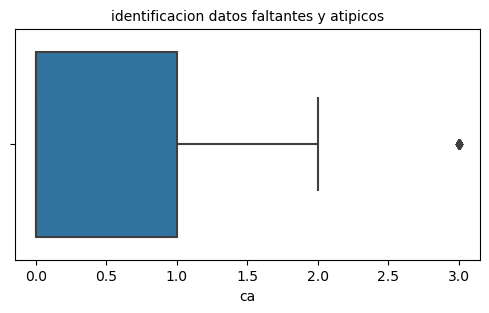

In [7]:
#identificacion datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ca'])
plt.title('identificacion datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

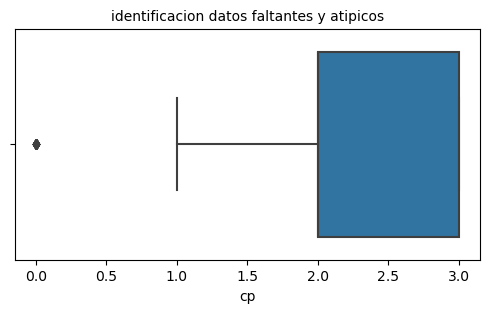

In [8]:
#identificacion datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('identificacion datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

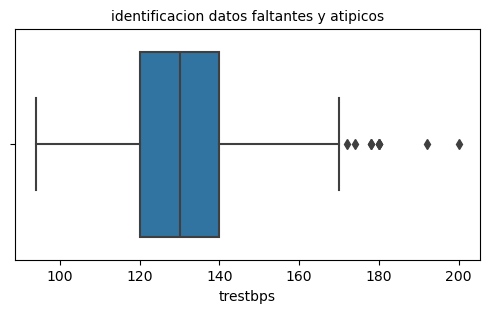

In [9]:
#identificacion datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('identificacion datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

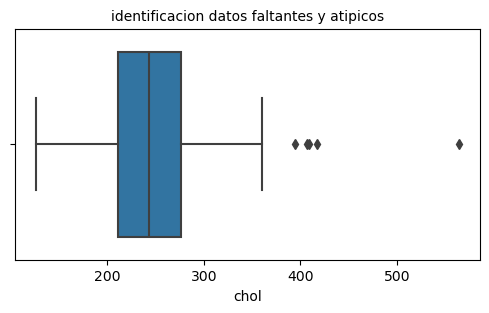

In [10]:
#identificacion datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('identificacion datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

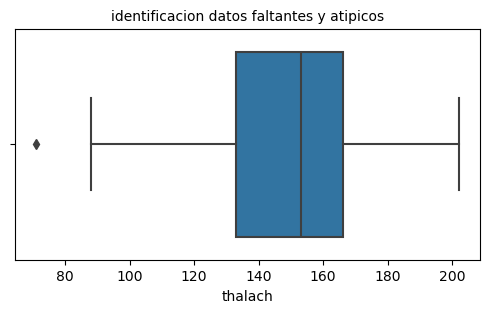

In [13]:
#identificacion datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('identificacion datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

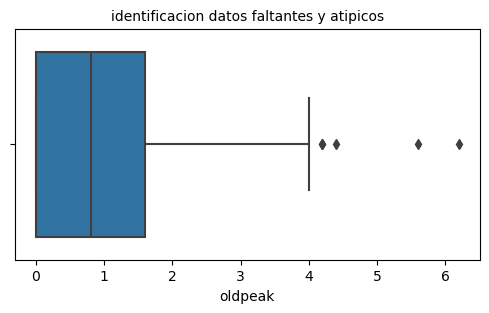

In [14]:
#identificacion datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('identificacion datos faltantes y atipicos', fontsize=10)

In [18]:
#revision datos faltantes
print("Cantidad de registros con cero en sex:", Datos['sex'].isin([0]).sum())
print("Cantidad de registros con cero en cp:", Datos['cp'].isin([0]).sum())
print("Cantidad de registros con cero en exang:", Datos['exang'].isin([0]).sum())
print("Cantidad de registros con cero en oldpeak:", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de registros con cero en slope:", Datos['slope'].isin([0]).sum())
print("Cantidad de registros con cero en thal:", Datos['thal'].isin([0]).sum())
print("Cantidad de registros con cero en condition:", Datos['condition'].isin([0]).sum())

Cantidad de registros con cero en sex: 96
Cantidad de registros con cero en cp: 23
Cantidad de registros con cero en exang: 200
Cantidad de registros con cero en oldpeak: 96
Cantidad de registros con cero en slope: 139
Cantidad de registros con cero en thal: 164
Cantidad de registros con cero en condition: 160


In [21]:
#remplazamos datos faltantes o null con el valor promedio de cada columna
Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['thal']=Datos['thal'].replace(0,Datos['thal'].mean())
Datos['condition']=Datos['condition'].replace(0,Datos['condition'].mean())

In [20]:
#revision nuevamente datos faltantes
print("Cantidad de registros con cero en sex:", Datos['sex'].isin([0]).sum())
print("Cantidad de registros con cero en cp:", Datos['cp'].isin([0]).sum())
print("Cantidad de registros con cero en exang:", Datos['exang'].isin([0]).sum())
print("Cantidad de registros con cero en oldpeak:", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de registros con cero en slope:", Datos['slope'].isin([0]).sum())
print("Cantidad de registros con cero en thal:", Datos['thal'].isin([0]).sum())
print("Cantidad de registros con cero en condition:", Datos['condition'].isin([0]).sum())

Cantidad de registros con cero en sex: 0
Cantidad de registros con cero en cp: 0
Cantidad de registros con cero en exang: 0
Cantidad de registros con cero en oldpeak: 0
Cantidad de registros con cero en slope: 0
Cantidad de registros con cero en thal: 0
Cantidad de registros con cero en condition: 0


In [26]:
#contamos los datos atipicos

Min_edad=35
Max_edad=71
Edad_atipica=((Datos['age']<Min_edad) | (Datos['age']>Max_edad)).sum()
print("El total de datos atípicos en la columna age es de {}".format(Edad_atipica))

Min_trestbps=99
Max_trestbps=175
trestbps_atipica=((Datos['trestbps']<Min_trestbps) | (Datos['trestbps']>Max_trestbps)).sum()
print("El total de datos atípicos en la columna trestbps es de {}".format(trestbps_atipica))

Min_chol=145
Max_chol=350
chol_atipica=((Datos['chol']<Min_chol)|(Datos['chol']>Max_chol)).sum()
print("El total de datos atípicos en la columna chol es de {}".format(chol_atipica))

Min_thalach=75
Max_thalach=195
thalach_atipica=((Datos['thalach']<Min_thalach)|(Datos['thalach']>Max_thalach)).sum()
print("El total de datos atípicos en la columna thalach es de {}".format(thalach_atipica))

El total de datos atípicos en la columna age es de 6
El total de datos atípicos en la columna trestbps es de 9
El total de datos atípicos en la columna chol es de 11
El total de datos atípicos en la columna thalach es de 2


In [27]:
#filtramos los datos atipicos

Datos=Datos[(Datos['age']<Max_edad)&(Datos['age']>Min_edad)]
Datos=Datos[(Datos['trestbps']<Max_trestbps)&(Datos['trestbps']>Min_trestbps)]
Datos=Datos[(Datos['thalach']<Max_thalach)&(Datos['thalach']>Min_thalach)]
Datos=Datos[(Datos['chol']<Max_chol)&(Datos['chol']>Min_chol)]

In [28]:
# Validar si se removieron los datos atípicos

Edad_atipica=((Datos['age']<Min_edad) | (Datos['age']>Max_edad)).sum()
print("El total de datos atípicos en la columna age es de {}".format(Edad_atipica))

trestbps_atipica=((Datos['trestbps']<Min_trestbps) | (Datos['trestbps']>Max_trestbps)).sum()
print("El total de datos atípicos en la columna trestbps es de {}".format(trestbps_atipica))

chol_atipica=((Datos['chol']<Min_chol)|(Datos['chol']>Max_chol)).sum()
print("El total de datos atípicos en la columna chol es de {}".format(chol_atipica))

thalach_atipica=((Datos['thalach']<Min_thalach)|(Datos['thalach']>Max_thalach)).sum()
print("El total de datos atípicos en la columna thalach es de {}".format(thalach_atipica))

El total de datos atípicos en la columna age es de 0
El total de datos atípicos en la columna trestbps es de 0
El total de datos atípicos en la columna chol es de 0
El total de datos atípicos en la columna thalach es de 0


In [29]:
#revision de datos y validacion de datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 293
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        263 non-null    int64  
 1   sex        263 non-null    float64
 2   cp         263 non-null    float64
 3   trestbps   263 non-null    int64  
 4   chol       263 non-null    int64  
 5   fbs        263 non-null    int64  
 6   restecg    263 non-null    int64  
 7   thalach    263 non-null    int64  
 8   exang      263 non-null    float64
 9   oldpeak    263 non-null    float64
 10  slope      263 non-null    float64
 11  ca         263 non-null    int64  
 12  thal       263 non-null    float64
 13  condition  263 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 30.8 KB


In [30]:
#validamos la cantidad de personas en condicion de enfermedad cardiaca
Datos['condition']=Datos['condition'].astype(int)
Datos['condition'].value_counts()

condition
0    139
1    124
Name: count, dtype: int64

In [31]:
Datos[['condition']].head(50)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
10,1


In [32]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
X = Datos.drop('condition',axis=1) 
Y = Datos['condition'] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [33]:
print (X_train)

     age       sex        cp  trestbps  chol  fbs  restecg  thalach     exang  \
91    62  0.676768  2.000000       130   263    0        0       97  0.326599   
196   61  1.000000  3.000000       140   207    0        2      138  1.000000   
268   48  1.000000  3.000000       122   222    0        2      186  0.326599   
274   46  1.000000  3.000000       120   249    0        2      144  0.326599   
162   67  1.000000  3.000000       125   254    1        0      163  0.326599   
..   ...       ...       ...       ...   ...  ...      ...      ...       ...   
158   70  1.000000  3.000000       130   322    0        2      109  0.326599   
31    58  1.000000  1.000000       120   284    0        2      160  0.326599   
165   67  0.676768  3.000000       106   223    0        0      142  0.326599   
14    56  1.000000  2.158249       120   193    0        2      162  0.326599   
108   54  1.000000  2.000000       120   258    0        2      147  0.326599   

      oldpeak     slope  ca

In [34]:
print (y_train)

91     1
196    1
268    0
274    1
162    1
      ..
158    1
31     1
165    0
14     0
108    0
Name: condition, Length: 197, dtype: int32


In [35]:
# Construimos el modelo de regresión logística 
reg_logistica = LogisticRegression(solver = "liblinear") 
reg_logistica.fit(X_train, y_train)   
# modelo de prediccion
Pred_Logistica = reg_logistica.predict(X_test)

In [36]:
print (y_test)

35     1
87     1
280    1
114    0
43     0
      ..
173    1
198    1
284    0
253    0
283    1
Name: condition, Length: 66, dtype: int32


In [37]:
print (Pred_Logistica)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1]


In [39]:
# Desempeño del modelo de regresión
print(classification_report(y_test,Pred_Logistica))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.84      0.68      0.75        31

    accuracy                           0.79        66
   macro avg       0.80      0.78      0.78        66
weighted avg       0.80      0.79      0.78        66



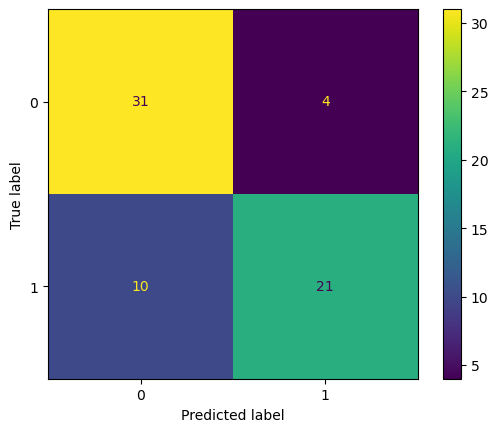

In [40]:
#Matrix de Confusión
cm=confusion_matrix(y_test,Pred_Logistica)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

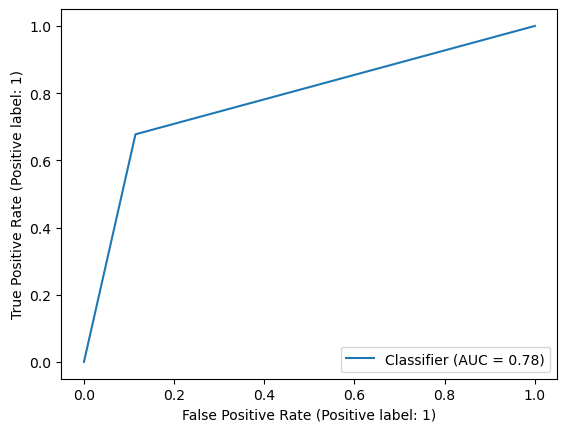

In [41]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Pred_Logistica)
plt.show()